# Case Study


**Objective**: Apply what we learn about Pandas to analyze a dataset and learn how to use visualizations to answer business questions: 

**Case**:
* We have a dataset of food sales. 
* The dataset has data of the following variables: OrderID, UnitPrice, Quantity, Discount, ShippedDate, ShipCountry, ProductName, Year, and Category
* The dataset has complete values of all columns, but because it comes from another application, the data types or formats of some columns do not completely suit our needs. 
* We need to modify the formats and data types of a few columns so that the dataset is ready for analysis. 

**Business Questions**:

* Once the dataset is ready for analysis, we want to use it to answer the following questions:

    * **How do the sales change over periods? Here, a period is defined as year+quarter.** 
    * **How are the sales across different categories?**
    * **How are the sales across different countries?** 
    * **How are the sales distributed?**  
    * **What are the sales percentage of different categories against the total sales?**
    
* We will visualize the dataset to answer the above questions. 

In [1]:
# -- import libraries -- 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

In [2]:
# -- Set and configure plot appearance and format --
# -- See here for more options: https://matplotlib.org/users/customizing.html --
%matplotlib inline


# Why Visualize Data?
* A picture is worth a thousand words
* To spot anomalies
* To identify patterns
* To present relationships
* To show the meaning of data
* <a href='https://en.wikipedia.org/wiki/Anscombe%27s_quartet'>Anscombe's quartet</a>: four data sets that have similar descriptive statistics, but have quite different distributions and patterns
![Anscombe's quartet](Anscombe's_quartet_3.svg)

#  Plotting in Python

**There are many Python libraries that we can use to visualize data. For now, we will introduce the most common one, Matplotlib.**

## Matplotlib Objects: 
* Figure: which is a canvas that may contain many plots, which are called Axes.  
* Axes: is generally what we mean as a plot or a chart. Each Axes object is characterized by two Axis. A common name for an Axes is called a subplot. 
* Axis: objects that contain numerical values marked on the Axes, define the limits of X-axis and Y-axis, and manage the ticks and tick labels of X-axis and Y-axis.  

**Figure, Axes (subplots), and Axis**
<table>
    <tr><td><img src='subplot.JPG' width='300' height = '500'></td><td><img src='axes_axis.PNG' width='300' height='500'></td></tr>
    </table>

## Four Methods to Plot a Chart
* Pandas DataFrame: has built-in charting capability. 
* MATPLOTLIB Library: 
    * MATLAB style: MATLAB is a programming platform designed specifically for engineers and scientists. It has strong functions for charting. The Python community borrows lessons from MATLAB's charting design and creates Matplotlib. 
    * Object-oriented approach: Matplolib also supports object-oriented approach, which is developed to address a few issues in the MATLAB style. 
* Seaborn: a data visualization library based on matplotlib. 

# DataFrame

In [3]:
# -- Load dataset, foodSales.csv --
# -- The ShippedDate column is in a format dif

foodSales = pd.read_csv('https://raw.githubusercontent.com/ttchuang/dataset/master/foodSales.csv')


In [4]:
foodSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OrderID      629 non-null    int64  
 1   UnitPrice    629 non-null    object 
 2   Quantity     629 non-null    int64  
 3   Discount     629 non-null    float64
 4   ShippedDate  629 non-null    object 
 5   ShipCountry  629 non-null    object 
 6   ProductName  629 non-null    object 
 7   Year         629 non-null    int64  
 8   Category     629 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 44.4+ KB


## Examine Data Types and Format
**Data Issues: Please examine the dataset. Do you see any problems with the data?**

In [5]:
# -- Examine the dataset --
foodSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OrderID      629 non-null    int64  
 1   UnitPrice    629 non-null    object 
 2   Quantity     629 non-null    int64  
 3   Discount     629 non-null    float64
 4   ShippedDate  629 non-null    object 
 5   ShipCountry  629 non-null    object 
 6   ProductName  629 non-null    object 
 7   Year         629 non-null    int64  
 8   Category     629 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 44.4+ KB


In [6]:
# -- Preview the dataset
foodSales.head()

,OrderID,UnitPrice,Quantity,Discount,ShippedDate,ShipCountry,ProductName,Year,Category
0,10886,$31.00,70,0.0,3/2/2008,Brazil,Ikura,2008,Seafood
1,10886,$12.50,35,0.0,3/2/2008,Brazil,Gorgonzola Telino,2008,Dairy Products
2,10886,$13.00,40,0.0,3/2/2008,Brazil,Original Frankfurter grüne Soße,2008,Condiments
3,10903,$6.00,40,0.0,3/4/2008,Brazil,Konbu,2008,Seafood
4,10903,$21.05,21,0.0,3/4/2008,Brazil,Louisiana Fiery Hot Pepper Sauce,2008,Condiments


In [8]:
# -- Deal with improper data format --
foodSales['UnitPrice'] = foodSales['UnitPrice'].str.replace('$','')
foodSales['UnitPrice'] = foodSales['UnitPrice'].astype(float)
foodSales['UnitPrice'].dtype

dtype('float64')

In [9]:
# -- Deal with improper data types --
foodSales['ShippedDate']=pd.to_datetime(foodSales['ShippedDate'])

In [10]:
foodSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OrderID      629 non-null    int64         
 1   UnitPrice    629 non-null    float64       
 2   Quantity     629 non-null    int64         
 3   Discount     629 non-null    float64       
 4   ShippedDate  629 non-null    datetime64[ns]
 5   ShipCountry  629 non-null    object        
 6   ProductName  629 non-null    object        
 7   Year         629 non-null    int64         
 8   Category     629 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 44.4+ KB


**Note**: Another way to deal with the issue of Date being the string data type is to use parse_dates, the argument of which is a list of the columns that have the date or time format. 


In [11]:
# -- Load dataset, foodSales.csv --
# -- The ShippedDate column is in a format dif

foodSales2 = pd.read_csv('https://raw.githubusercontent.com/ttchuang/dataset/master/foodSales.csv',
                         parse_dates=['ShippedDate'])
foodSales2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OrderID      629 non-null    int64         
 1   UnitPrice    629 non-null    object        
 2   Quantity     629 non-null    int64         
 3   Discount     629 non-null    float64       
 4   ShippedDate  629 non-null    datetime64[ns]
 5   ShipCountry  629 non-null    object        
 6   ProductName  629 non-null    object        
 7   Year         629 non-null    int64         
 8   Category     629 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 44.4+ KB


## Create Periods

### Using to_period()

**Create a new column called QuarterlyPeriod, whose values have the format, 2008Q1.**

In [12]:
# -- Creat new columns 
foodSales['QuarterlyPeriod']=foodSales['ShippedDate'].dt.to_period('Q')
foodSales.head()

,OrderID,UnitPrice,Quantity,Discount,ShippedDate,ShipCountry,ProductName,Year,Category,QuarterlyPeriod
0,10886,31.00,70,0.0,2008-03-02,Brazil,Ikura,2008,Seafood,2008Q1
1,10886,12.50,35,0.0,2008-03-02,Brazil,Gorgonzola Telino,2008,Dairy Products,2008Q1
2,10886,13.00,40,0.0,2008-03-02,Brazil,Original Frankfurter grüne Soße,2008,Condiments,2008Q1
3,10903,6.00,40,0.0,2008-03-04,Brazil,Konbu,2008,Seafood,2008Q1
4,10903,21.05,21,0.0,2008-03-04,Brazil,Louisiana Fiery Hot Pepper Sauce,2008,Condiments,2008Q1


**Exercises:** Use to_period() to add a new column called MonthlyPeriod

### Create a New Column

**Create a new column called Quarter**

In [13]:
# -- Creat new columns 
foodSales['Quarter']=foodSales['ShippedDate'].dt.quarter
foodSales.head()

,OrderID,UnitPrice,Quantity,Discount,ShippedDate,ShipCountry,ProductName,Year,Category,QuarterlyPeriod,Quarter
0,10886,31.00,70,0.0,2008-03-02,Brazil,Ikura,2008,Seafood,2008Q1,1
1,10886,12.50,35,0.0,2008-03-02,Brazil,Gorgonzola Telino,2008,Dairy Products,2008Q1,1
2,10886,13.00,40,0.0,2008-03-02,Brazil,Original Frankfurter grüne Soße,2008,Condiments,2008Q1,1
3,10903,6.00,40,0.0,2008-03-04,Brazil,Konbu,2008,Seafood,2008Q1,1
4,10903,21.05,21,0.0,2008-03-04,Brazil,Louisiana Fiery Hot Pepper Sauce,2008,Condiments,2008Q1,1


In [14]:
# -- Create periods --
foodSales['Periods']=foodSales['Year'].astype(str)+'0'+foodSales['Quarter'].astype(str)

In [15]:
# -- Preview --
foodSales.head()

,OrderID,UnitPrice,Quantity,Discount,ShippedDate,ShipCountry,ProductName,Year,Category,QuarterlyPeriod,Quarter,Periods
0,10886,31.00,70,0.0,2008-03-02,Brazil,Ikura,2008,Seafood,2008Q1,1,200801
1,10886,12.50,35,0.0,2008-03-02,Brazil,Gorgonzola Telino,2008,Dairy Products,2008Q1,1,200801
2,10886,13.00,40,0.0,2008-03-02,Brazil,Original Frankfurter grüne Soße,2008,Condiments,2008Q1,1,200801
3,10903,6.00,40,0.0,2008-03-04,Brazil,Konbu,2008,Seafood,2008Q1,1,200801
4,10903,21.05,21,0.0,2008-03-04,Brazil,Louisiana Fiery Hot Pepper Sauce,2008,Condiments,2008Q1,1,200801


**Exercises**:  Create a new column called Month, whose values are from extracting ShippedDate


In [16]:
foodSales['MonthlyPeriod'] = foodSales['ShippedDate'].dt.to_period('M')
foodSales.head()

,OrderID,UnitPrice,Quantity,Discount,ShippedDate,ShipCountry,ProductName,Year,Category,QuarterlyPeriod,Quarter,Periods,MonthlyPeriod
0,10886,31.00,70,0.0,2008-03-02,Brazil,Ikura,2008,Seafood,2008Q1,1,200801,2008-03
1,10886,12.50,35,0.0,2008-03-02,Brazil,Gorgonzola Telino,2008,Dairy Products,2008Q1,1,200801,2008-03
2,10886,13.00,40,0.0,2008-03-02,Brazil,Original Frankfurter grüne Soße,2008,Condiments,2008Q1,1,200801,2008-03
3,10903,6.00,40,0.0,2008-03-04,Brazil,Konbu,2008,Seafood,2008Q1,1,200801,2008-03
4,10903,21.05,21,0.0,2008-03-04,Brazil,Louisiana Fiery Hot Pepper Sauce,2008,Condiments,2008Q1,1,200801,2008-03


# Plotting

## Line Chart

**How do the sales change over monthly periods?**

In [17]:
# -- Calculate extended amount --
foodSales['ExtendedAmt']=foodSales['UnitPrice']*foodSales['Quantity']
foodSales.head()

,OrderID,UnitPrice,Quantity,Discount,ShippedDate,ShipCountry,ProductName,Year,Category,QuarterlyPeriod,Quarter,Periods,MonthlyPeriod,ExtendedAmt
0,10886,31.00,70,0.0,2008-03-02,Brazil,Ikura,2008,Seafood,2008Q1,1,200801,2008-03,2170.00
1,10886,12.50,35,0.0,2008-03-02,Brazil,Gorgonzola Telino,2008,Dairy Products,2008Q1,1,200801,2008-03,437.50
2,10886,13.00,40,0.0,2008-03-02,Brazil,Original Frankfurter grüne Soße,2008,Condiments,2008Q1,1,200801,2008-03,520.00
3,10903,6.00,40,0.0,2008-03-04,Brazil,Konbu,2008,Seafood,2008Q1,1,200801,2008-03,240.00
4,10903,21.05,21,0.0,2008-03-04,Brazil,Louisiana Fiery Hot Pepper Sauce,2008,Condiments,2008Q1,1,200801,2008-03,442.05


In [18]:
# -- Sum up extended amount by Periods --
foodSales_Period=foodSales.groupby('MonthlyPeriod')['ExtendedAmt'].sum()
foodSales_Period

MonthlyPeriod
2006-07     2052.00
2006-08    12024.70
2006-09     4807.80
2006-10    16868.00
2006-11    13772.00
2006-12    14171.80
2007-01    13492.30
2007-02    12335.00
2007-03    15928.00
2007-04    13931.44
2007-05    12958.00
2007-06    11333.10
2007-07    17669.55
2007-08    17159.59
2007-09    19203.88
2007-10    33059.05
2007-11    19283.27
2007-12    19770.37
2008-01    19568.03
2008-02    26554.21
2008-03    23195.60
2008-04    39571.14
2008-05    11139.90
2008-06      409.95
Freq: M, Name: ExtendedAmt, dtype: float64

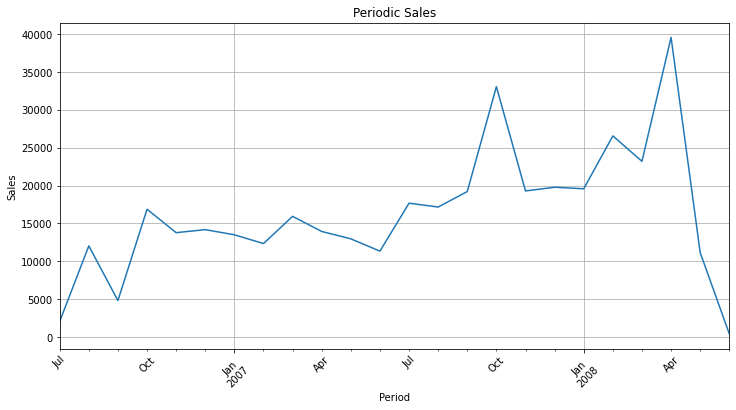

In [19]:
# -- Line chart --
foodSales_Period.plot(title='Periodic Sales',
                      xlabel='Period',
                      ylabel='Sales',
                      grid=True,
                      rot = 45,
                      figsize=(12,6));

## Bar and Column Charts

* **How are the sales across categories?**
* **How are the sales across countries?** 

**Syntax**:

    * Column chart: DataFrame.plot.bar()
    * Bar chart: Dataframe.plot.barh()

In [20]:
foodSales.head()

,OrderID,UnitPrice,Quantity,Discount,ShippedDate,ShipCountry,ProductName,Year,Category,QuarterlyPeriod,Quarter,Periods,MonthlyPeriod,ExtendedAmt
0,10886,31.00,70,0.0,2008-03-02,Brazil,Ikura,2008,Seafood,2008Q1,1,200801,2008-03,2170.00
1,10886,12.50,35,0.0,2008-03-02,Brazil,Gorgonzola Telino,2008,Dairy Products,2008Q1,1,200801,2008-03,437.50
2,10886,13.00,40,0.0,2008-03-02,Brazil,Original Frankfurter grüne Soße,2008,Condiments,2008Q1,1,200801,2008-03,520.00
3,10903,6.00,40,0.0,2008-03-04,Brazil,Konbu,2008,Seafood,2008Q1,1,200801,2008-03,240.00
4,10903,21.05,21,0.0,2008-03-04,Brazil,Louisiana Fiery Hot Pepper Sauce,2008,Condiments,2008Q1,1,200801,2008-03,442.05


In [21]:
# -- Calcualte total sales of different categories --
foodSales_category = foodSales.groupby('Category')['ExtendedAmt'].sum()
foodSales_category

Category
Condiments         66152.60
Dairy Products    138165.60
Meat/Poultry       96676.28
Seafood            89264.20
Name: ExtendedAmt, dtype: float64

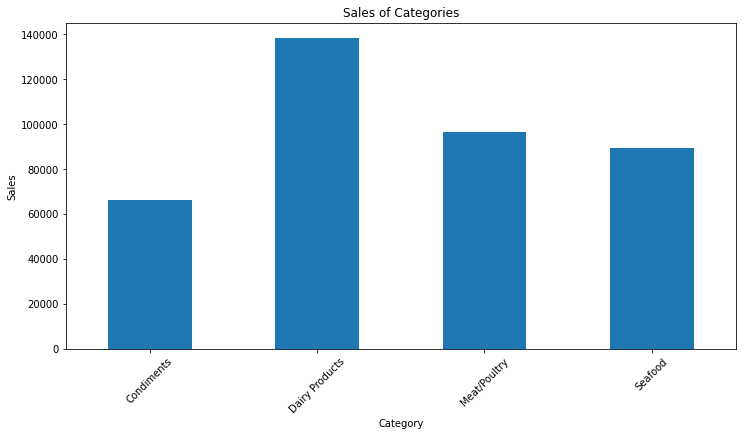

In [22]:
# -- Plot a column chart --
foodSales_category.plot.bar(title='Sales of Categories',
                           xlabel='Category',
                           ylabel='Sales',
                            rot=45,
                           figsize=(12,6));

### Add Data Labels

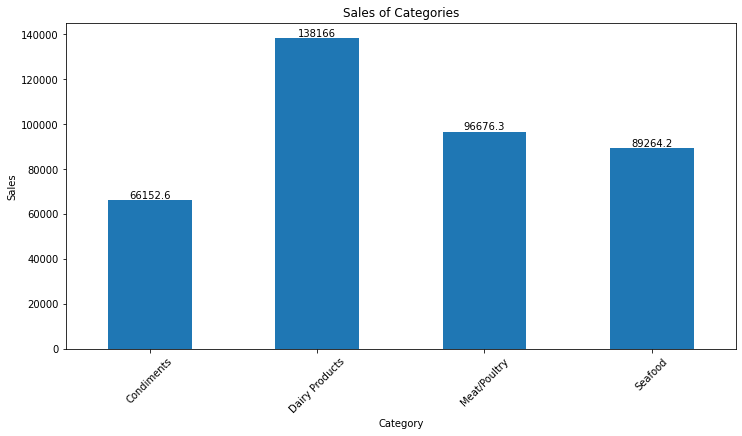

In [23]:
# -- Plot a column chart --
fig = foodSales_category.plot.bar(title='Sales of Categories',
                           xlabel='Category',
                           ylabel='Sales',
                            rot=45,
                           figsize=(12,6))
fig.bar_label(fig.containers[0],label_type='edge');

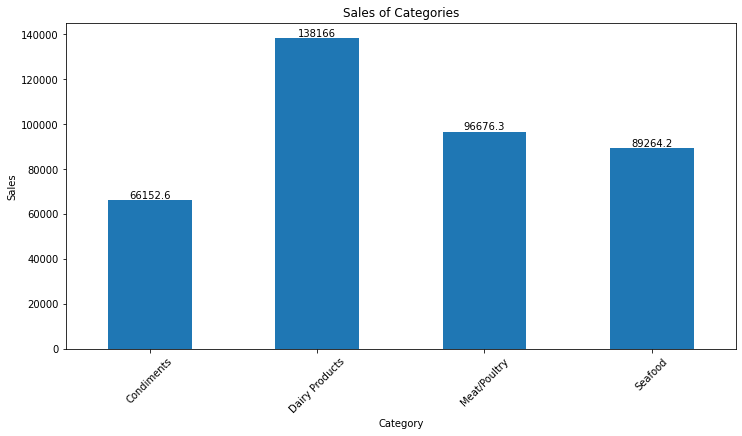

In [24]:
# -- Plot a column chart --
fig = foodSales_category.plot.bar(title='Sales of Categories',
                           xlabel='Category',
                           ylabel='Sales',
                            rot=45,
                           figsize=(12,6))
for container in fig.containers:
    fig.bar_label(container)

### Clustered Columns

In [25]:
import statistics as s

In [26]:
# -- Add a fictitious budget sales --
foodSales['BudgetSales']=foodSales['ExtendedAmt']*s.NormalDist(mu=1,sigma=0.2).samples(1)

In [27]:
foodSales.head()

,OrderID,UnitPrice,Quantity,Discount,ShippedDate,ShipCountry,ProductName,Year,Category,QuarterlyPeriod,Quarter,Periods,MonthlyPeriod,ExtendedAmt,BudgetSales
0,10886,31.00,70,0.0,2008-03-02,Brazil,Ikura,2008,Seafood,2008Q1,1,200801,2008-03,2170.00,2473.873482
1,10886,12.50,35,0.0,2008-03-02,Brazil,Gorgonzola Telino,2008,Dairy Products,2008Q1,1,200801,2008-03,437.50,498.764815
2,10886,13.00,40,0.0,2008-03-02,Brazil,Original Frankfurter grüne Soße,2008,Condiments,2008Q1,1,200801,2008-03,520.00,592.817609
3,10903,6.00,40,0.0,2008-03-04,Brazil,Konbu,2008,Seafood,2008Q1,1,200801,2008-03,240.00,273.608127
4,10903,21.05,21,0.0,2008-03-04,Brazil,Louisiana Fiery Hot Pepper Sauce,2008,Condiments,2008Q1,1,200801,2008-03,442.05,503.951969


In [28]:
# -- Sum up ExtendedAmt and BudgetSales by Quarterly Periods --
foodSales_B_A = foodSales.groupby('QuarterlyPeriod')[['ExtendedAmt','BudgetSales']].sum()

In [29]:
foodSales_B_A

,ExtendedAmt,BudgetSales
QuarterlyPeriod,,
2006Q3,18884.50,21528.969480
2006Q4,44811.80,51086.969448
2007Q1,41755.30,47602.455947
2007Q2,38222.54,43574.989918
2007Q3,54033.02,61599.472504
2007Q4,72112.69,82210.908530
2008Q1,69317.84,79024.684889
2008Q2,51120.99,58279.659694


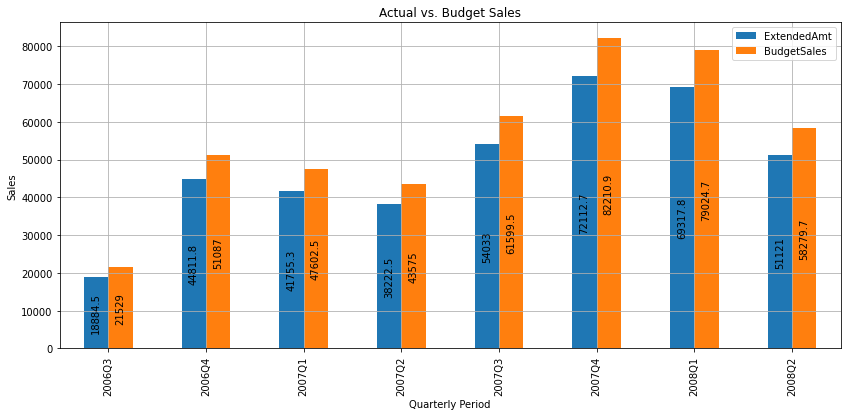

In [30]:
# -- Plot clustered columns --
ax = foodSales_B_A.plot.bar(title='Actual vs. Budget Sales',
                            xlabel = 'Quarterly Period',
                            ylabel = 'Sales',
                            grid = True,
                            figsize=(14,6)
                           )
ax.bar_label(ax.containers[0],label_type='center',rotation=90)
ax.bar_label(ax.containers[1],label_type='center',rotation=90);

**Exercise**:

* Plot the foodSales_category in bar chart. 

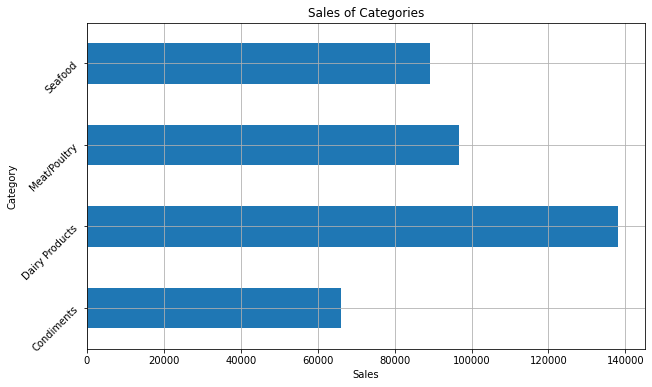

In [31]:
# -- What is the breakdown of category? 
foodSales_category.plot.barh(title='Sales of Categories',
                           ylabel='Category',
                           xlabel='Sales',
                            rot=45,
                             grid=True,
                           figsize=(10,6));

**Exercise** 

**How are the sales across countries?**

    * You need to group the data by country and sum up the extended amount. 
    * Then, plot the groupped results. 

In [32]:
foodSales_country = foodSales.groupby('ShipCountry')['ExtendedAmt'].sum()
foodSales_country

ShipCountry
Brazil      50380.10
Canada      24324.90
Denmark     15210.25
France      43349.66
Germany    117717.54
Italy        8751.65
USA        130524.58
Name: ExtendedAmt, dtype: float64

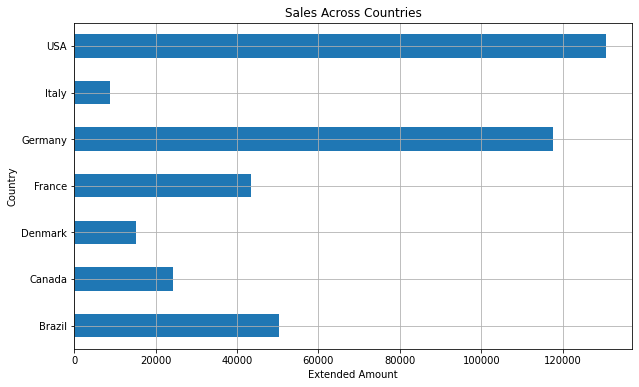

In [33]:
foodSales_country.plot.barh(title = 'Sales Across Countries',
                           xlabel = 'Extended Amount',
                           ylabel = 'Country',
                           grid = True,
                           figsize = (10,6));

## Historgram Chart

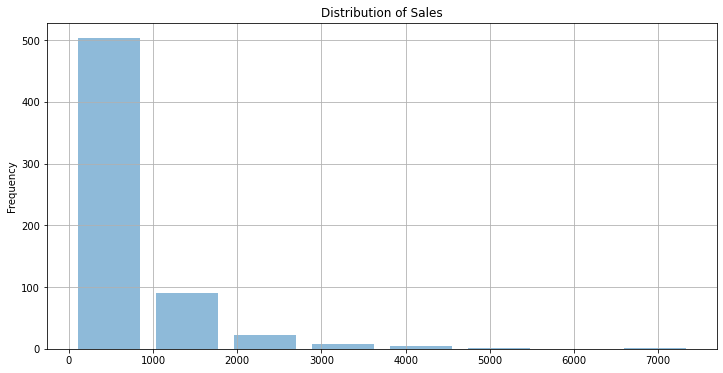

In [34]:
# -- How are the sales distributed? --
# -- Use 8 bins, alpha = 0.5, rwidthe = 0.8 
foodSales['ExtendedAmt'].plot.hist(bins=8, 
                                   rwidth = 0.8,
                                   alpha=0.5,
                                   title='Distribution of Sales',
                                   grid = True,
                                   figsize=(12,6));

## Scatter Plot
* Used for two variables
* To show how one is affected by the other

**Extended Amount  vs. Quantity**

**Note**: These two variables are clearly related. So, the example is for illustration only. It doesn't really mean very much!!!

In [35]:
foodSales.columns

Index(['OrderID', 'UnitPrice', 'Quantity', 'Discount', 'ShippedDate',
       'ShipCountry', 'ProductName', 'Year', 'Category', 'QuarterlyPeriod',
       'Quarter', 'Periods', 'MonthlyPeriod', 'ExtendedAmt', 'BudgetSales'],
      dtype='object')

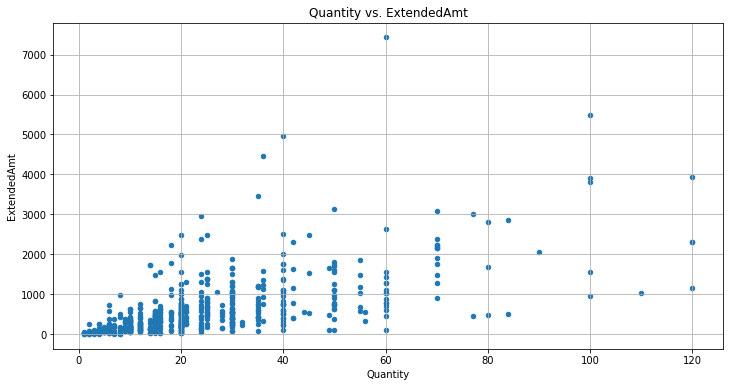

In [36]:
# --Quantity vs. Extended Amount

Qty_ExtendedAmt =foodSales[['Quantity','ExtendedAmt','Category']]
Qty_ExtendedAmt.plot.scatter(x='Quantity',
                             y='ExtendedAmt',
                             title='Quantity vs. ExtendedAmt',
                             figsize=(12,6),
                             grid=True);

In [37]:
foodSales['Category'].unique()

array(['Seafood', 'Dairy Products', 'Condiments', 'Meat/Poultry'],
      dtype=object)

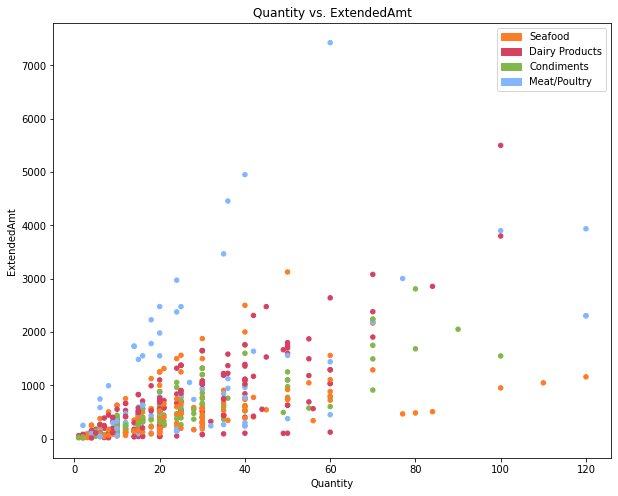

In [38]:
import matplotlib.patches as mpatches

category = ['Seafood', 'Dairy Products', 'Condiments', 'Meat/Poultry']
colors = ['#ff7b25','#d64161','#82b74b','#82b7ff']

Qty_ExtendedAmt =foodSales[['Quantity','ExtendedAmt','Category']]

# color_choice = lambda x: colors[0] if x=='Seafood' else (colors[1] if x=='Dairy Products'),

Qty_ExtendedAmt.plot.scatter(x='Quantity',
                             y='ExtendedAmt',
                             title='Quantity vs. ExtendedAmt',
                             c = Qty_ExtendedAmt['Category'].apply(lambda x: colors[category.index(x)]),
                             figsize=(10,8))

Seafood = mpatches.Patch(color = '#ff7b25', label = 'Seafood')
Dairy = mpatches.Patch(color = '#d64161', label = 'Dairy Products')
Condiment = mpatches.Patch(color = '#82b74b', label = 'Condiments')
Meat = mpatches.Patch(color = '#82b7ff', label = 'Meat/Poultry')

plt.legend(handles = [Seafood, Dairy, Condiment, Meat],loc='best');

## Box Chart

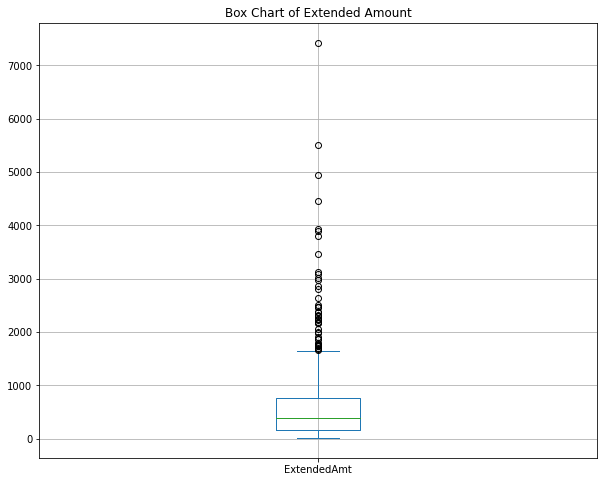

In [39]:
# -- How are the Sales  column distributed?
# -- Use Box chart
foodSales['ExtendedAmt'].plot.box(title='Box Chart of Extended Amount',
                                   grid=True,
                                  figsize=(10,8));

## Pie Chart

**What are the sales percentage of different categories against the total sales?**

In [40]:
foodSales_category

Category
Condiments         66152.60
Dairy Products    138165.60
Meat/Poultry       96676.28
Seafood            89264.20
Name: ExtendedAmt, dtype: float64

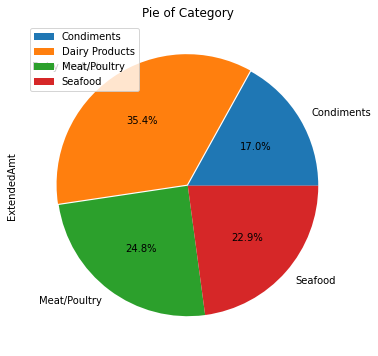

In [41]:
# -- Use pie chart to show the percentage of Category --
foodSales_category.plot.pie(title='Pie of Category',
                            legend='best',
                            autopct='%1.1f%%',
                            explode=[0.0,0.01,0.0,0.0],
                            figsize=(12,6));